# **Mini Capstone Project: Crime Data Analysis with MySQL and Python**

### **Introduction:**

In this capstone project, we will use Python, specifically the PyMySQL library, to interact with a MySQL database in order to analyze and gain insights from crime data. The dataset includes information such as DR NO, Date Reported, Date Occurred, Area Name, Crime Code, Crime Code Description, Victim Age, Victim Sex, Premises Description, Status, Location, Latitude, and Longitude.

### **Objectives:**

### **1. Database Setup and Import :**

   - Create a MySQL database.

 - Load the provided crime dataset into the MySQL database.

### **2. Database Connection :**

   - Use PyMySQL to establish a connection to the database in Pycharm or VS code.

   - Verify the successful import of data in pycharm.

In [2]:
# pip install mysql-connector-python
#----
# pip install pymysql 

In [55]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns                
from plotly import express as px        # import plotly.express as px

In [4]:
connection = pymysql.connect(host="localhost", user="root", password="MY#1pass", database="capstone", port = 3306)

In [52]:
query = "select * from crime_data;"

crime_df = pd.read_sql(query, connection)
crime_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\3683789348.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


### **3. Data Exploration :** 
- Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.

- Identify the distinct crime codes and their descriptions.


In [7]:
crime_df = pd.read_csv("crime_data.csv")
total_record = len(crime_df)
# crime_df.info()
summary = crime_df.describe()
print(f"total number of records :{total_record}")
print(f"summary statistics :{summary}")
#-----------
column = ["AREA_NAME","Crm_Cd","Crm_Cd_Desc"]
for i in column:
  unique_value = crime_df[i].unique()
  print(f"unique value in {i} column:", unique_value )



total number of records :499
summary statistics :              DR_NO      Crm_Cd    Vict_Age         LAT         LON
count  4.990000e+02  499.000000  499.000000  499.000000  499.000000
mean   1.999930e+08  504.178357   32.142285   34.047335 -118.261283
std    8.742243e+06  198.381863   20.202136    0.053840    0.041560
min    1.030447e+07  210.000000    0.000000   33.710000 -118.560000
25%    2.001044e+08  330.000000   23.000000   34.040000 -118.260000
50%    2.001048e+08  442.000000   31.000000   34.050000 -118.250000
75%    2.001064e+08  624.000000   46.500000   34.050000 -118.240000
max    2.220130e+08  956.000000   78.000000   34.280000 -118.190000
unique value in AREA_NAME column: ['Southwest' 'Central' 'N Hollywood' 'Mission' 'Van Nuys' 'Wilshire'
 'Rampart' 'Harbor' 'Pacific' 'Hollenbeck' 'West LA' 'Northeast'
 'Foothill' 'Hollywood' 'West Valley' '77th Street' 'Olympic' 'Devonshire'
 'Southeast']
unique value in Crm_Cd column: [624 745 740 442 946 341 330 930 648 354 230 761 35

In [8]:
# to find distinct Crime code and description
query_Crm_Cd = """
select distinct Crm_Cd, Crm_Cd_Desc
from crime_data;
"""
distinct_Crm_Cd = pd.read_sql(query_Crm_Cd, connection)
distinct_Crm_Cd


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2488\2150717127.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  distinct_Crm_Cd = pd.read_sql(query_Crm_Cd, connection)


,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
1,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
8,648,ARSON
9,354,THEFT OF IDENTITY


### **4. Temporal Analysis:**

   - Analyze the temporal aspects of the data.

   - Determine trends in crime occurrence over time. 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2488\2082432049.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  occ_df = pd.read_sql(query_tmp, connection)


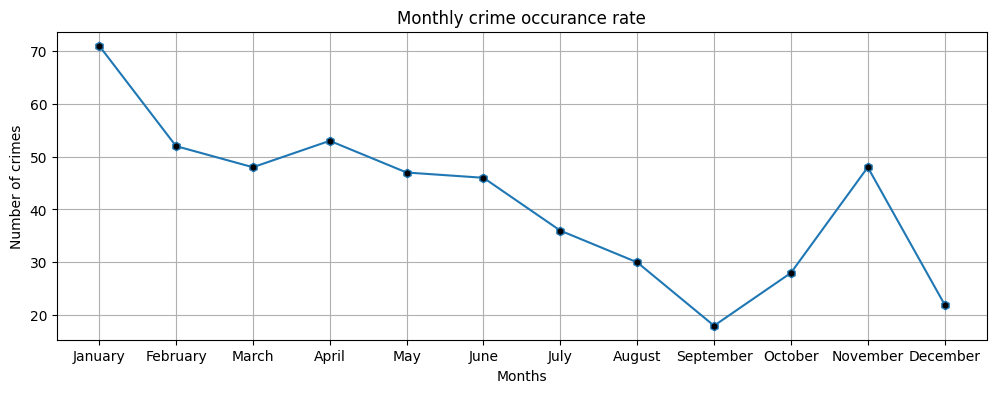

In [9]:
# Monthly crime rate in 2020
query_tmp = """
select  year(str_to_date(date_occ,'%d-%m-%y')) AS crime_year,
        month(str_to_date(date_occ,'%d-%m-%y')) AS crime_month,
        monthname(str_to_date(date_occ,'%d-%m-%y')) AS crime_monthname,
        COUNT(*) AS num_crimes
    from crime_data
    group by crime_year, crime_month,crime_monthname
    order by crime_month;
"""
occ_df = pd.read_sql(query_tmp, connection)
month=occ_df["crime_monthname"]
total = occ_df["num_crimes"]

plt.figure(figsize=(12,4))
plt.plot(month,total, marker="h", markerfacecolor="black")
plt.xlabel("Months")
plt.ylabel("Number of crimes")
plt.title("Monthly crime occurance rate")
plt.grid(True)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\1167822713.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



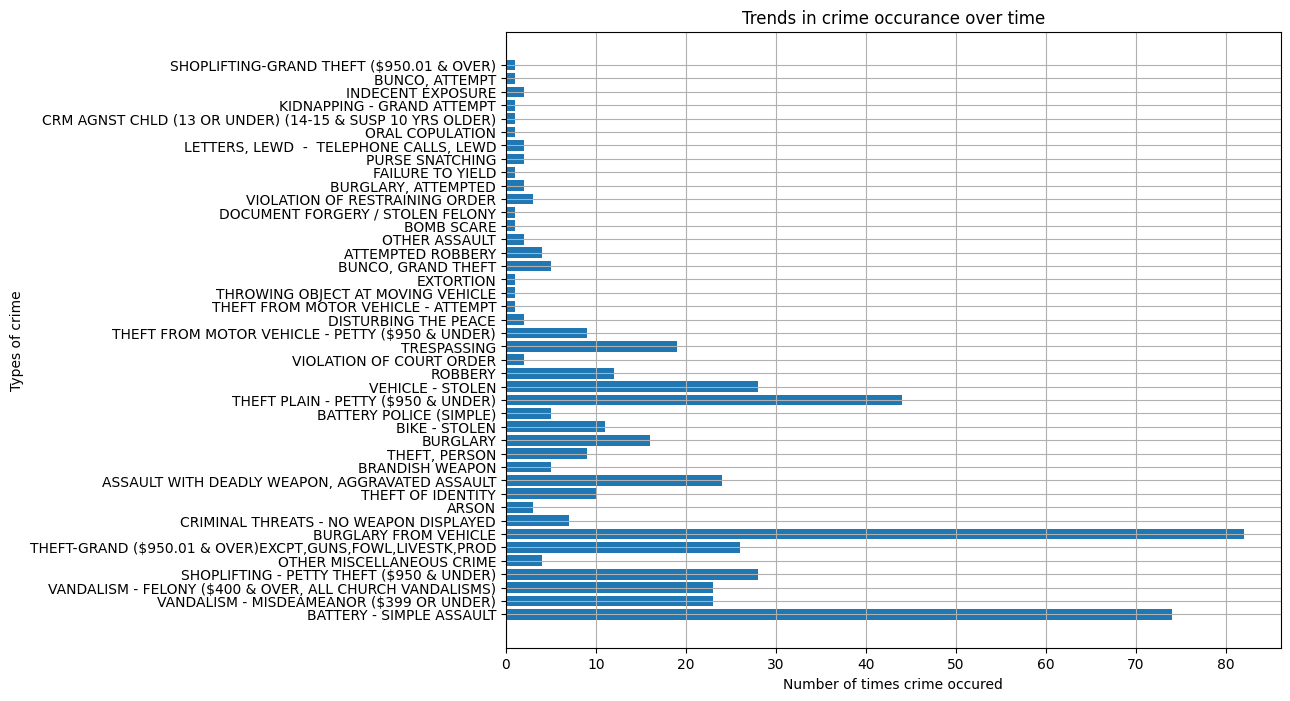

In [75]:

query_trend = """ 
select Crm_Cd_Desc, count(Crm_Cd_Desc) as num_crime
from crime_data
group by Crm_Cd_Desc;
"""
crm_trend = pd.read_sql(query_trend, connection)
crm_type = crm_trend["Crm_Cd_Desc"]
num_of_crime = crm_trend["num_crime"]

plt.figure(figsize=(10,8))
plt.barh(crm_type, num_of_crime)
plt.ylabel("Types of crime")
plt.xlabel("Number of times crime occured")
plt.title("Trends in crime occurance over time")
plt.grid(True)
plt.show()

   ### **5. Spatial Analysis:**
   - Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.
   - Visualize crime hotspots on a map.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\166373578.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



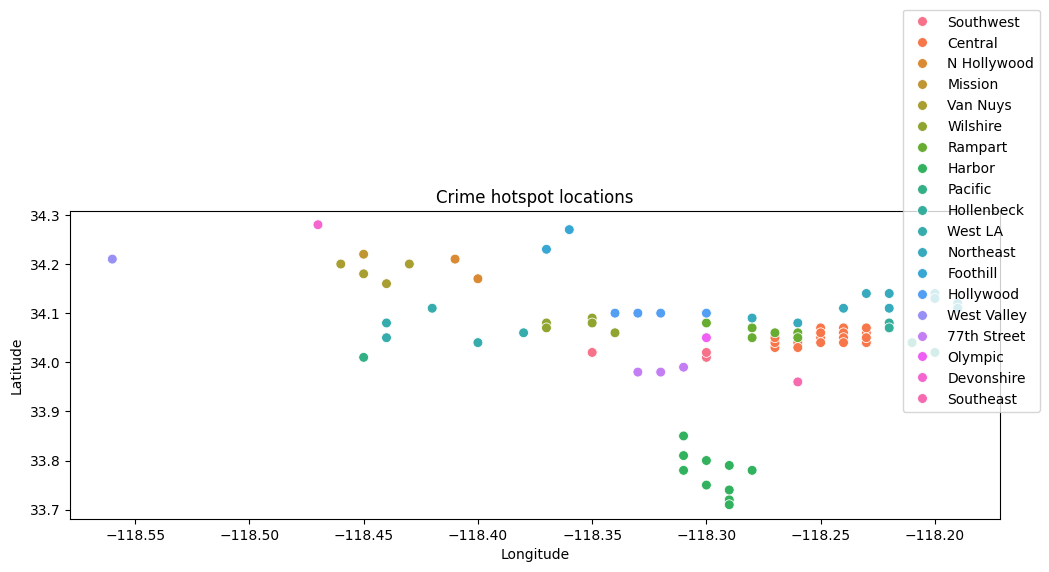

In [59]:
query3 = """
select lat, lon, area_name
from crime_data
group by  lat, lon, area_name ; 
""" 
spatial_data = pd.read_sql(query3, connection)
plt.figure(figsize=(12,4))
sns.scatterplot(data=spatial_data, x="lon", y="lat", hue="area_name", s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc="center right")
plt.title("Crime hotspot locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()




### **6. Victim Demographics:**
- Investigate the distribution of victim ages and genders.
- Identify common premises descriptions where crimes occur.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\359484355.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\359484355.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




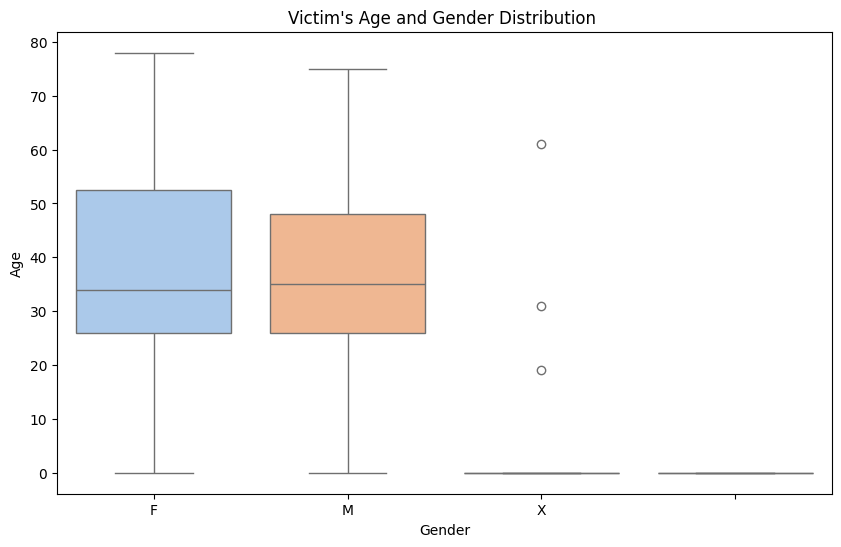

In [54]:
query_ag= """
select Vict_Age, Vict_Sex
from crime_data;
    """
dist_ag = pd.read_sql(query_ag, connection)  
age = dist_ag["Vict_Age"] 
sex = dist_ag["Vict_Sex"]

plt.figure(figsize=(10,6))
sns.boxplot(x=sex , y=age, data=dist_ag, palette="pastel")
plt.title("Victim's Age and Gender Distribution ")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

In [ ]:
query_pre = """
select area_name,Premis_Desc
from crime_data
group by area_name,Premis_Desc;
"""
com_pre = pd.read_sql(query_pre, connection)
com_pre

### **7. Status Analysis:**
- Examine the status of reported crimes.
- Classify crimes based on their current status.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2488\1833612346.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  status_data = pd.read_sql(query1, connection)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2488\1833612346.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stu, y=stu_cnt, data=status_data, palette='bright')


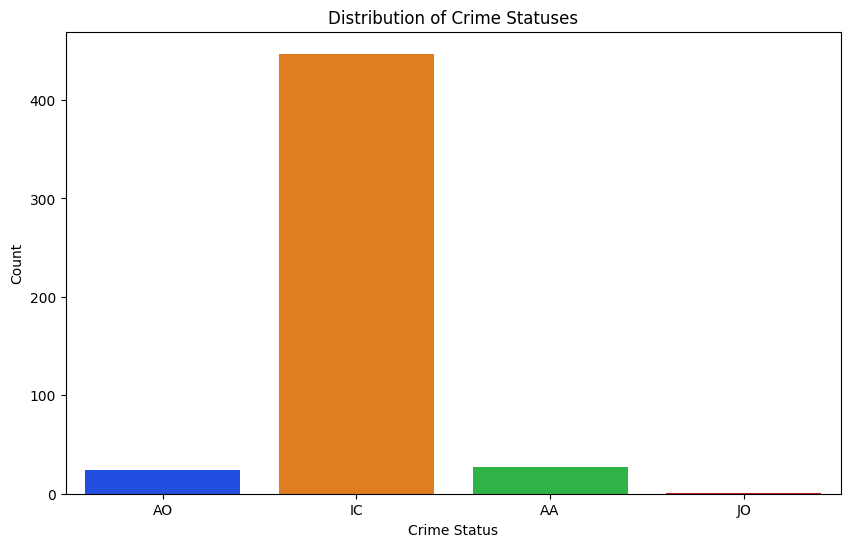

In [14]:
query1 = """
select status , count(*) as status_count
from crime_data
where status is not null
group by status;
"""
status_data = pd.read_sql(query1, connection)
stu = status_data["status"]
stu_cnt = status_data["status_count"]

plt.figure(figsize=(10, 6))
sns.barplot(x=stu, y=stu_cnt, data=status_data, palette='bright')
plt.title('Distribution of Crime Statuses')
plt.xlabel('Crime Status')
plt.ylabel('Count')
# plt.legend()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\2314752580.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



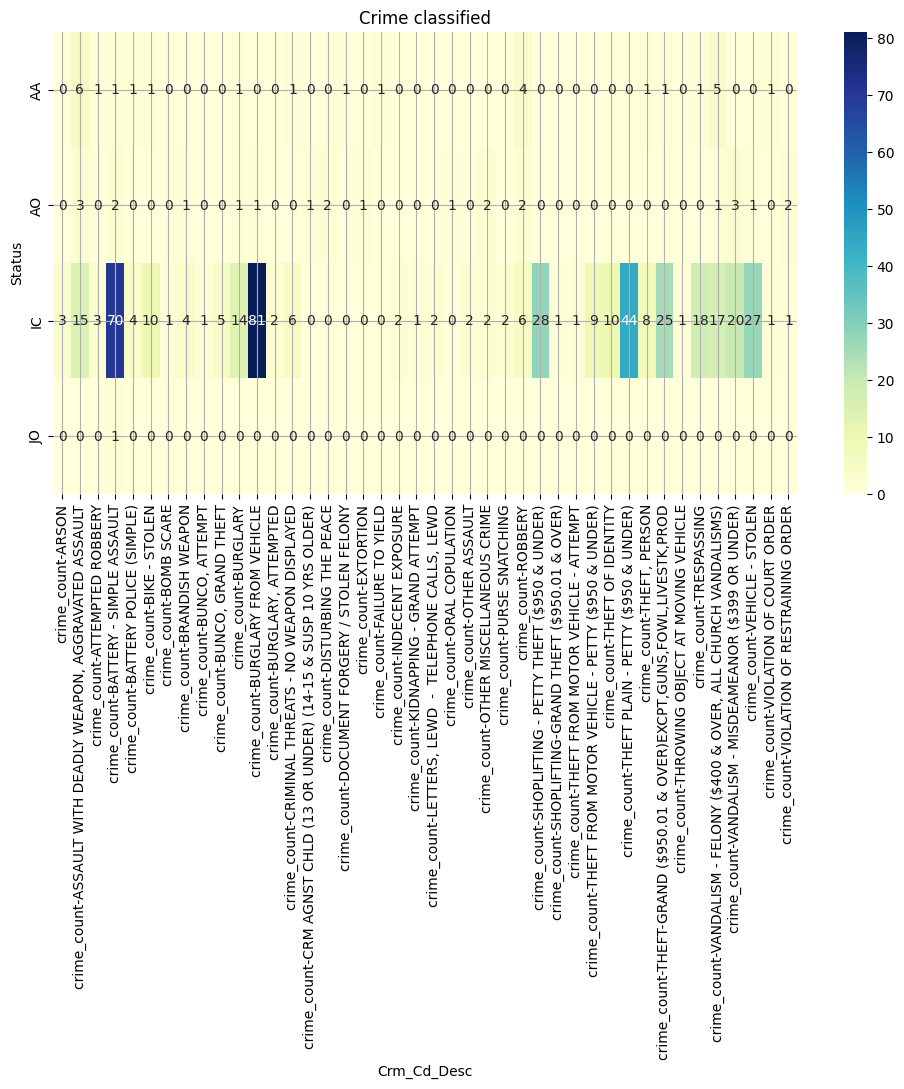

In [51]:
query2 = """
select Crm_Cd_Desc, status , count(*) as crime_count
from crime_data
where status is not null
group by Crm_Cd_Desc, status;
"""
status_df = pd.read_sql(query2, connection)

hmap_data = status_df.pivot_table(index="status", columns="Crm_Cd_Desc", fill_value=0 )

plt.figure(figsize=(12,6))
sns.heatmap(hmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.xlabel("Crm_Cd_Desc")
plt.ylabel("Status")
plt.title("Crime classified")
plt.grid(True)
plt.show()


### **Questions:**


In [2]:
import pymysql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # import matplotlib.pyplot as pl
import seaborn as sns                
from plotly import express as px        # import plotly.express as px

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22408\4063513456.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
connection = pymysql.connect(host="localhost", user="root", password="MY#1pass", database="capstone", port = 3306)

In [56]:
query = """
select * from crime_data;
"""
crime_data = pd.read_sql(query,connection)
crime_data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\1786971900.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26



**Spatial Analysis:**

Where are the geographical hotspots for reported crimes?


In [5]:
query1 = """
select lat, lon, area_name
from crime_data
group by  lat, lon, area_name ; 
""" 
spatial_data = pd.read_sql(query1, connection)   # to establish connection between MySQL and Python

plt.figure(figsize=(12,10))
fig=px.scatter(spatial_data, x="lon", y="lat", color="area_name",
labels={"lon":"Longitude", "lat":"Latitude"})
fig.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22408\4247718560.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  spatial_data = pd.read_sql(query1, connection)   # to establish connection between MySQL and Python
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


<Figure size 1200x1000 with 0 Axes>

In [19]:
import warnings
warnings.filterwarnings("ignore")

import folium as flm
# flm.Map().add_to(globals())

query1 = """
select lat, lon, area_name
from crime_data
group by  lat, lon, area_name ; 
""" 
crime_df = pd.read_sql(query1, connection)   # to establish connection between MySQL and Python

# Set the size of the map
map_width = 800  # set your desired width
map_height = 600  # set your desired height

# Create a map centered at the mean of the coordinates
crime_map = flm.Map(location=[crime_df['lat'].mean(), crime_df['lon'].mean()], zoom_start=14, width=map_width, height=map_height)

# Add markers for each crime incident
for index, row in crime_df.iterrows():
    popup_text = f"Area name: {row['area_name']}"
    flm.Marker([row['lat'], row['lon']], popup=popup_text).add_to(crime_map)


# Save the map as an HTML file or display it in the Jupyter Notebook
crime_map.save("crime_map.html")
crime_map


**Victim Demographics:**

What is the distribution of victim ages in reported crimes?
is there a significant difference in crime rates between male and female victims?


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\2122124001.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  victim_age = pd.read_sql(query2, connection)


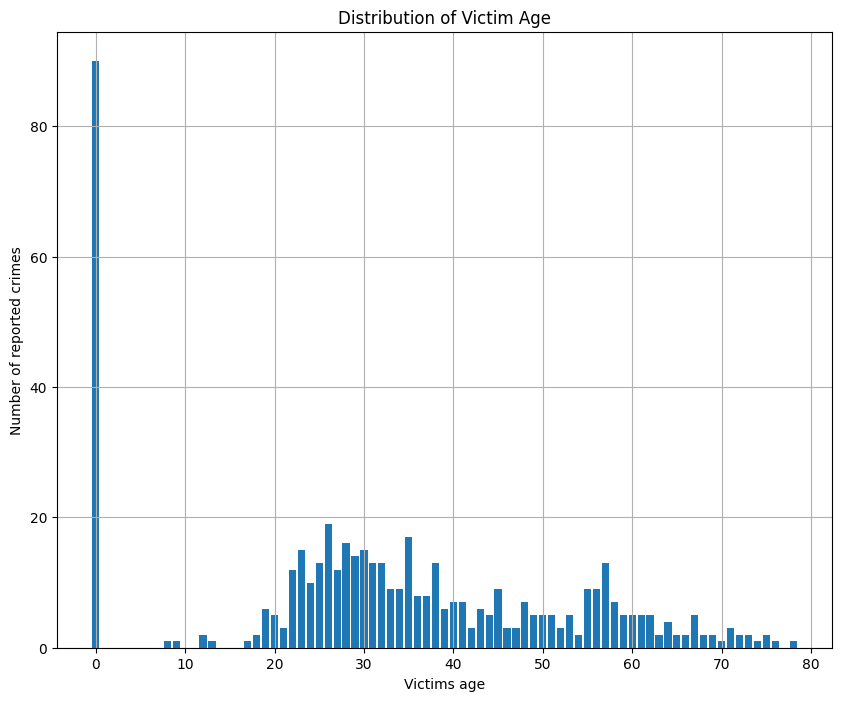

In [26]:
# Distribution of Victims Age
query2 = """
select Vict_Age, count(*) as total_ages
from crime_data
group by Vict_Age;
"""
victim_age = pd.read_sql(query2, connection)

plt.figure(figsize=(10,8))
plt.bar(victim_age["Vict_Age"], victim_age["total_ages"])
plt.xlabel("Victims age")
plt.ylabel("Number of reported crimes")
plt.title("Distribution of Victim Age")
plt.grid()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\2915269429.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



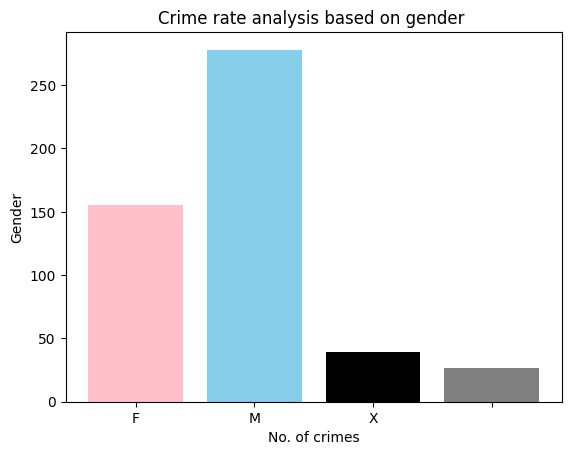

In [108]:
query3 = """
select Vict_Sex, count(*) as crime_rate
from crime_data
group by Vict_Sex;
"""
gender_crm = pd.read_sql(query3, connection)

colors = ["pink","skyblue","black","grey"]

plt.bar(gender_crm["Vict_Sex"], gender_crm["crime_rate"], color=colors )
plt.xlabel("No. of crimes")
plt.ylabel("Gender")
plt.title("Crime rate analysis based on gender ")
plt.show()
fig = px.pie(gender_crm, names=gender_crm["Vict_Sex"], values=gender_crm["crime_rate"])  # to show data in percentage
fig.show()



**Location Analysis:**

Where do most crimes occur based on the "Location" column?


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\883329659.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



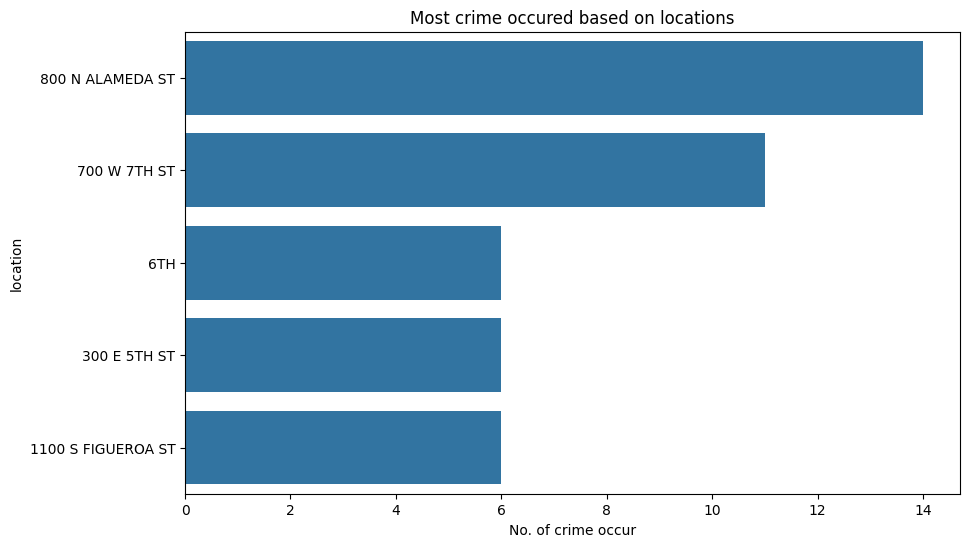

In [107]:
# most crime occur in location
query4 = """
select location, count(*) as num_crime
from crime_data
group by location
having count(*)>5 ;
"""
q1_df = pd.read_sql(query4, connection)   
np.median(q1_df["num_crime"])   # to find median for num_crime to display some highest crime locations
plt.figure(figsize=(10,6))  
sns.barplot(y=q1_df["location"],x=q1_df["num_crime"], data=q1_df, orient="horizontal") 
plt.ylabel("location")
plt.xlabel("No. of crime occur")
plt.title("Most crime occured based on locations")
# plt.grid(True)
plt.show()


**Crime Code Analysis:**

What is the distribution of reported crimes based on Crime Code?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5932\434641343.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cr = pd.read_sql(query5, connection)


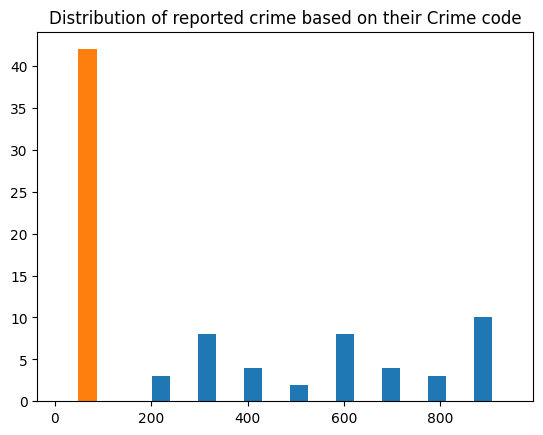

In [14]:
# Distribution of reported crime
query5 = """
select crm_cd, count(*) as crime_rate
from crime_data
group by crm_cd;
"""
df_cr = pd.read_sql(query5, connection)

plt.hist(df_cr)
plt.title("Distribution of reported crime based on their Crime code")
plt.show()